In [2]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

In [3]:
DATASET_PATH= "data.json"

In [4]:
import json
import numpy as np

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    #Convert list into a numpy array
    
    inputs = np.array(data["mfcc"],dtype=np.float32)
    targets = np.array(data["labels"],dtype=np.float32)
   # np.asarray(X).astype(np.float32)
    
    return inputs, targets

In [5]:
if __name__=="__main__":
    #load data
    inputs, targets = load_data(DATASET_PATH)
    
    #split the data into train and test sets
    inputs_train, inputs_test, targets_train, targets_test= train_test_split(inputs, targets, test_size=0.3)
    
    #buil the network architecture
    model = keras.Sequential([
        #input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
        # 1st hidden layer
        keras.layers.Dense(512, activation="relu"),
        #2nd hidden layer
        keras.layers.Dense(256, activation="relu"),
        #3rd hidden layer
        keras.layers.Dense(64, activation="relu"),
        #output layer
        keras.layers.Dense(5, activation="softmax")   
    ])
    
    #compile the network
    optimizer = keras.optimizers.Adam(lr=0.0001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    model.summary()
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 780)               0         
                                                                 
 dense (Dense)               (None, 512)               399872    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 547,973
Trainable params: 547,973
Non-trainable params: 0
_________________________________________________________________


2022-08-17 06:47:04.075933: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-17 06:47:04.075995: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kaliw): /proc/driver/nvidia/version does not exist
2022-08-17 06:47:04.078737: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/kaliw/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
#train network
history= model.fit(inputs_train, targets_train,
          validation_data=(inputs_test, targets_test),
          epochs=50, 
          batch_size=32
         )

Epoch 1/50
2/2 [==============================] - 1s 181ms/step - loss: 73.2969 - accuracy: 0.2034 - val_loss: 52.2595 - val_accuracy: 0.1154
Epoch 2/50
2/2 [==============================] - 0s 29ms/step - loss: 43.8606 - accuracy: 0.2034 - val_loss: 33.7564 - val_accuracy: 0.2308
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 29.2548 - accuracy: 0.2881 - val_loss: 21.8357 - val_accuracy: 0.2692
Epoch 4/50
2/2 [==============================] - 0s 47ms/step - loss: 19.3400 - accuracy: 0.3220 - val_loss: 13.5868 - val_accuracy: 0.2692
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 10.0850 - accuracy: 0.3390 - val_loss: 17.1665 - val_accuracy: 0.2692
Epoch 6/50
2/2 [==============================] - 0s 28ms/step - loss: 11.0293 - accuracy: 0.3390 - val_loss: 17.8154 - val_accuracy: 0.2308
Epoch 7/50
2/2 [==============================] - 0s 38ms/step - loss: 8.8510 - accuracy: 0.4237 - val_loss: 9.8576 - val_accuracy: 0.3846
Epoch 8/50
2/2

# Plot ACCURACY and 

In [9]:
import matplotlib.pyplot as plt

def plotHistory(history):
    fig, axs= plt.subplots(2)
    
    #create the accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    #create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

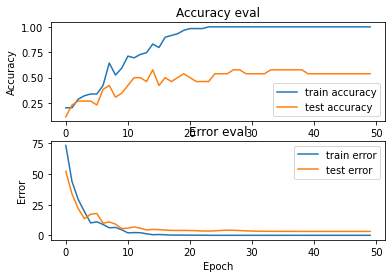

In [10]:
plotHistory(history)